# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


In this exercise we want to implement the Metropolis algorithm and apply it to the quantum mechanics problem of the Hydrogen atom.

**Hydrogen atom**

In quantum physics the state of a quantum system is mathematically described by a wave function $\Psi$, which is a complex-valued probability amplitude.

For one non-relativistic spinless particle, if the wave function $\Psi(\vec{x},t)$ that describes its state is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{x},t)|^2$, represents the probability density that the particle is at the position $\vec{x}$ at time $t$.

The wave function is expressed in terms of the parameters, called quantum numbers, that represent the symmetries of the system: $n=1,2,...$, the principal quantum number, $l=0,1, ..., n-1$, the azimuthal quantum number, and $m=-l, -l+1, ..., l-1, l$, the magnetic quantum number.

If we consider an electron in a Hydrogen atom then the wave functions $\Psi_{n,l,m}(r,\theta,\phi)$  in spherical coordinates related to the ground state (1s) and to one of the first excited states (2p) are analitically simple:

$$
1s:\ \ \ \Psi_{1,0,0}(r,\theta,\phi)= \frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

$$
2p:\ \ \ \Psi_{2,1,0}(r,\theta,\phi)= \frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529 \ nm$ is the Bohr radius.

Many properties of the systems can be derived knowing the respective wave functions, since their square modulus represent a probability density. For example, the expectation value for the radius of an electron orbital in the Hydrogen atom can be evalueted as:

$$\left\langle r \right\rangle_{\Psi_{n,l,m}} = \int r \ |\Psi_{n,l,m}(r, \theta, \phi)|^2 \ d \vec x $$

And so, for the 1s and the 2p orbitals:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>

Having simple analytical solutions of these problems makes this quantum model useful to test and optimize the Metropolis algorithm.

**Metropolis algorithm**
    
The Metropolis algorithm is a Monte Carlo method used to sample probability distributions. 

It is based on the analogy with the behaviour of system a that approaches an equilibrium whose statistical properties are independent of the kinetics of the system, which is a stochastic transfer matrix $K(x|y)$ that governs the evolution of the system. 

Assuming $K(x|y)$ is known, if we want to find $p(x)$, it is important that $K(x|y)$ is regular and that satisfies principle of detailed balance (i.e. the system is ergodic). In fact, if these hypotesis are satisfied, the transfer probability can be considered as product of a transition probability and an acceptance probability: $K(y|x)=T(y|x) \times A(y|x)$. Moreover, if the transition distribution is choosen symmetric, the acceptance probability can be evaluate as: $A(y|x)=min [1, p(y)/p(x)]$.

Thus, the process of sampling $p(x)$ turns out to be a Markov stochastic process: transitions from $x$ to $y$ are proposed using $T(y|x)$ and accepted or rejected with probability $A(y|x)$; if accepted, the system moves to the new configuration $y$, otherwise it remains in $x$. This random walk is built such that if the moves are repeated many times, the asymptotic distribution of $x$s is $p(x)$.

More practically, starting from an initial given configuration $x_0$, the algorithm repeats for each step $i=1...M$ the following:

- given the configuration $x_i$, it generates a new proposed configuration $x'$ with $T(x'|x_i)$;
- it evaluates the probability to accept it: $A(x'|x_i)=min [1, p(x')/p(x_i)]$;
- it draws a random number $r$ from a uniform distribution in $[0,1)$:

    - if $r \leq A(x'|x)$ then $x_{i+1}=x'$ (the move is accepted);
    - if $r > A(x'|x)$ then $x_{i+1}=x_i$ (the move is rejected).

### Exercise 05.1

Our purpose is to use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$, using first a uniform and then a gaussian transition probability $T(\vec{x}|\vec{y})$, with $M= 10^6$ simulation steps.

From the sampled positions we want to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their statistical uncertainties using data blocking and then to compare them with the analytical solutions.

In order to work on a dimensionlesss problem, we express distances in Bohr radius units $a_{0}$.

Before starting the simulation and printing final results, the simulation parameters for each sudy case have to be calibrated and chosen reasonably, as it is explained below.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

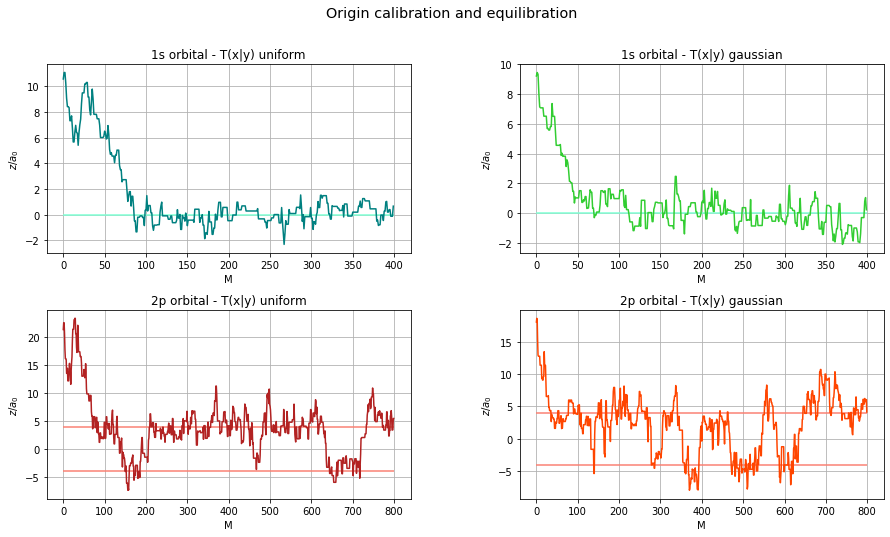

In [6]:
zu_1s = np.loadtxt("uniform/origin/1s_positions.out", usecols=(2), unpack=True, max_rows = 400)
zg_1s = np.loadtxt("gaussian/origin/1s_positions.out", usecols=(2), unpack=True, max_rows = 400)
zu_2p = np.loadtxt("uniform/origin/2p_positions.out", usecols=(2), unpack=True, max_rows =800)
zg_2p = np.loadtxt("gaussian/origin/2p_positions.out", usecols=(2), unpack=True, max_rows = 800)


fig=plt.figure(figsize=(15, 8))
plt.suptitle("Origin calibration and equilibration", size='x-large')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(221)
plt.plot(zu_1s, color='teal')
plt.title('1s orbital - T(x|y) uniform')
plt.hlines(0, 0, 400, color='aquamarine')
plt.xlabel('M')
plt.ylabel('$z/a_0$') 
plt.grid(True)
 
plt.subplot(222)
plt.plot(zg_1s, color='limegreen')
plt.title('1s orbital - T(x|y) gaussian')
plt.hlines(0, 0, 400, color='aquamarine')
plt.xlabel('M')
plt.ylabel('$z/a_0$')
plt.grid(True) 

plt.subplot(223)
plt.plot(zu_2p, color='firebrick')
plt.title('2p orbital - T(x|y) uniform')
plt.hlines(-4, 0, 800, color='salmon')
plt.hlines(4, 0, 800, color='salmon')
plt.xlabel('M')
plt.ylabel('$z/a_0$') 
plt.grid(True)

plt.subplot(224)
plt.plot(zg_2p, color='orangered')
plt.title('2p orbital - T(x|y) gaussian')
plt.hlines(-4, 0, 800, color='salmon')
plt.hlines(4, 0, 800, color='salmon')
plt.xlabel('M')
plt.ylabel('$z/a_0$') 
plt.grid(True)

plt.show()

**Parameters choice**

- **Time step**
    
The obtain good results with the Metropolis algorithm the time step $\delta$ of the transition probability has to be chosen in order to obtain $\sim 50 \%$ of acceptance rate: if the moves are too large the algorithm becomes less efficient, while if they are too small they can affect data with high correlation.

Some runs of the code enable to calibrate manually (inserting different $\delta$s as input for each simulation and evaluating the acceptance rate) their values for each case study; the resulting optimized parameters are the following:

- 1s orbital - uniform distribution: $\delta=1.23$;
- 2p orbital - uniform distribution: $\delta=2.97$;
- 1s orbital - gaussian distribution: $\delta=0.76$;
- 2p orbital - gaussian distribution: $\delta=1.88$;
    
In fact, with these parameters one obtains $e_A \approx 10^{-3}$, where $e_A$ represents the relative error of the acceptance rate $A$ compared to the target value $0.5$: $e_A=\frac{|A-0.5|}{0.5}$.


- **Starting position and equilibration**
    
As shown in the picture above, it is important to set a reasonable starting point $(x_0,y_0,z_0)$ for the simulation and/or to equilibrate the system before measuring the radius: when the simulation is started very far from the maximum of the $p(\vec x)$ to sample, the simulated random walk needs an amount of Metropolis steps to reach that and so to begin the effective sampling, when fluctuating in the region of maximum $p(\vec x)$.

For the 1s orbital the best choice of starting position is the origin, since it is described by a wave function with spherical simmetry around the origin.

For the 2p orbital the choice is less trivial: in fact, its wave function has two maximums simmetric to the plan $xy$, around $z=-4,4$. Running the simulation starting from the origin we obtain good results; a good choice for the starting point would be one of the two maximums too, but there is no difference between those three choices.

The pictures shown above describe the behaviour of one of the coordinates ($z$, wich is the more representative for seeing the maximums of $p(\vec x)$) for a simulation started far from the mentioned starting points, both for uniform and gaussian transition probabilities:
- for orbital 1s, starting from $(10,10,10)$: the random walk converges to $z=0$ as expected;

- for orbital 2p, starting from $(20,20,20)$: the random walk reaches the region of the two maximums of $p(z)$ and samples it (we can note that regions around $z=-4$ and $z=4$ are frequently visited)

Those pictures enable to set the number of steps required for the random walk to reach $p(\vec x)$ maximum(s) regions, that is needed for equilibrating the system when the symulation is started far away from the origin: a good choice is $10$ times the maximum value among $x_0$, $y_0$ and $z_0$. Note that if the starting point is chosen to be the origin, the equilibration is not necessary.

- **Data blocking**
    
Running the code a few times changing the number of blocks $N$ and observing the trend of the error bars width, a good choiche of that is $N=200$. In fact, the hypothesis of the Central Limit Theorem are satisfied: the error bars are not too small, so data is not too correlated, and decreasing $N$ they do not change in width.

**Note**: if compared to the previous exercises, $N$ is higher because also the number of steps of the simulation $M= 10^6$ is higher.

**Note**: further instructions on how to properly run the code with the optimized parameters are in the README.md file 

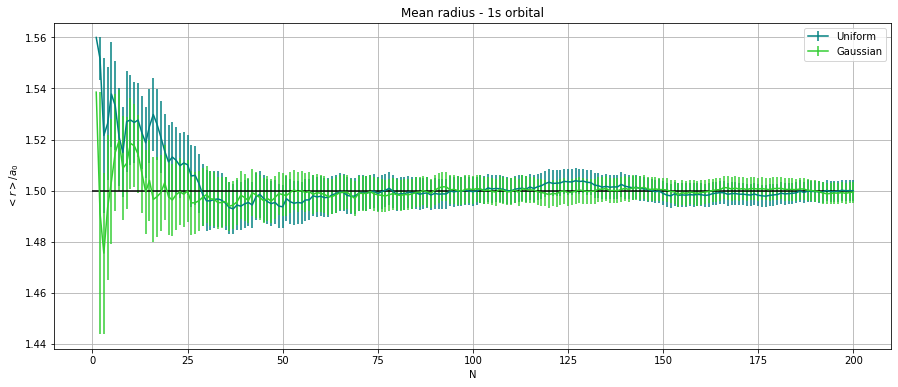

In [3]:
fig=plt.figure(figsize=(15, 6))

xu, yu, erroru = np.loadtxt("uniform/results/1s_radius.out", usecols=(0,1,2), unpack=True)
xg, yg, errorg = np.loadtxt("gaussian/results/1s_radius.out", usecols=(0,1,2), unpack=True)

plt.errorbar(xu,yu,yerr=erroru, color='teal',label="Uniform" )
plt.errorbar(xg,yg,yerr=errorg,color='limegreen', label="Gaussian")
plt.title("Mean radius - 1s orbital")
plt.xlabel('N')
plt.ylabel('$<r>/a_0$')
plt.hlines(1.5, 0, 200)
plt.grid(True)
plt.legend()
plt.show()

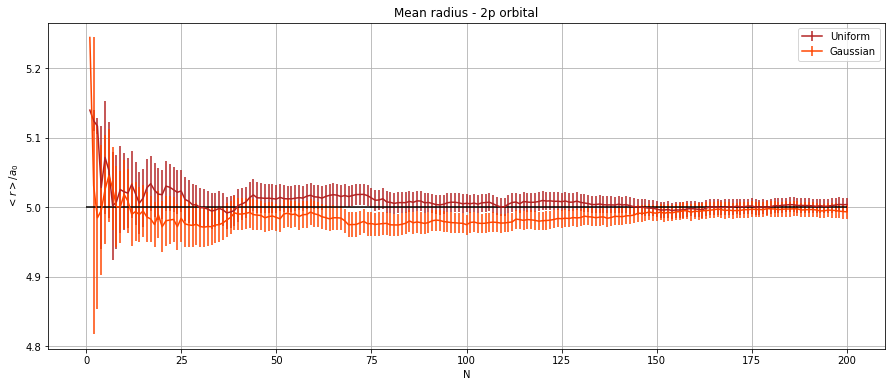

In [4]:
fig=plt.figure(figsize=(15, 6))

xu, yu, erroru = np.loadtxt("uniform/results/2p_radius.out", usecols=(0,1,2), unpack=True)
xg, yg, errorg = np.loadtxt("gaussian/results/2p_radius.out", usecols=(0,1,2), unpack=True)

plt.errorbar(xu,yu,yerr=erroru, color='firebrick', label="Uniform")
plt.errorbar(xg,yg,yerr=errorg, color='orangered', label="Gaussian")
plt.title("Mean radius - 2p orbital")
plt.xlabel('N')
plt.ylabel('$<r>/a_0$')
plt.hlines(5, 0, 200)
plt.grid(True)
plt.legend()

plt.show()

In both cases (uniform and gaussian transition probability) the mean radius values converge to the expected values for both 1s and 2p orbitals.

The figures below show how the sampled points distribute in the 3D space.

**Note**: only the points sampled with a gaussian transition probability are shown, but the ones sampled with the uniform exhibit the same behaviour.

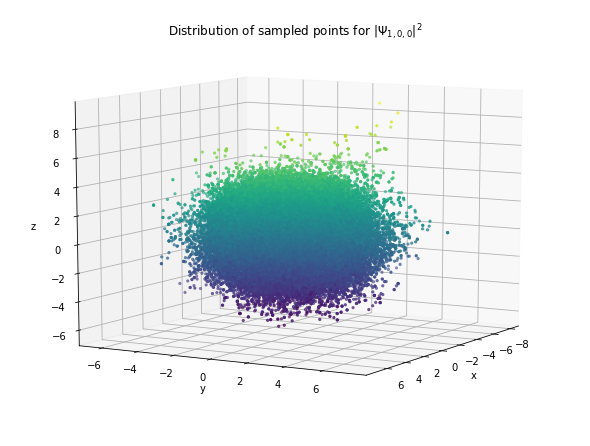

In [14]:
x,y,z=np.loadtxt("gaussian/results/1s_positions.out",usecols=(0,1,2), delimiter=' ', unpack=True)

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_title('Distribution of sampled points for $|\Psi_{1,0,0}|^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

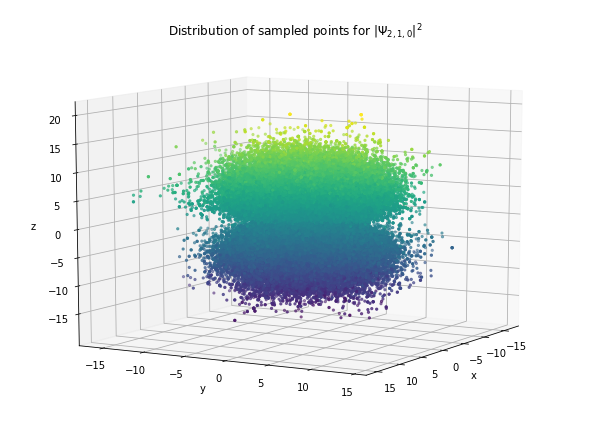

In [15]:
x2,y2,z2=np.loadtxt("gaussian/results/2p_positions.out",usecols=(0,1,2), delimiter=' ', unpack=True)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(x2, y2, z2, c=z2, marker='.')
ax.set_title('Distribution of sampled points for $|\Psi_{2,1,0}|^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

These spatial distributions have the expected classical orbital shapes of the ground state and of one of the three first excited states.